In [1]:
library(ggplot2)
library("dplyr")
library(viridis)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: viridisLite


In [2]:
path2 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/cellpose_cell_metadata.csv'
metadata1 = read.csv(path2, row.names = 1)

location = metadata1[,c('center_x','center_y')]
location1 = as.matrix(location)

idx1 = read.csv("data/cellidx_LH.csv")[,1]

location1 = location1[idx1,]

path2 = '/gladstone/engelhardt/pelka-collaboration/HumanColonCancerPatient1/cell_metadata.csv'
metadata = read.csv(path2, row.names = 1)

location = metadata[,c('center_x','center_y')]
location2 = as.matrix(location)

idx2 = read.csv("data/cellidx_patient1.csv")[,1]

location2 = location2[order(as.numeric(rownames(metadata))),]
location2 = location2[idx2,]

path2 = '/gladstone/engelhardt/pelka-collaboration/HumanColonCancerPatient2/cell_metadata.csv'
metadata = read.csv(path2, row.names = 1)

location = metadata[,c('center_x','center_y')]
location3 = as.matrix(location)

idx3 = read.csv("data/cellidx_patient2.csv")[,1]

location3 = location3[order(as.numeric(rownames(metadata))),]
location3 = location3[idx3,]

In [3]:
# get the genes
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/cellpose_cell_by_gene_goodgenes_noblanks.csv'
count = read.csv(path1, row.names = 1)
genes = colnames(count)

In [8]:
gklvalues = c()
topics = c(5,10,20,40,80)
for(i in 1:length(topics)){
load(paste0("modelssaved/three_sample_f",topics[i],"_s5K_l500_norm_i1000.RData"))

gklvalues[i] = out$gkl
}

In [ ]:
plot(topics,gklvalues)

In [4]:
# load("modelssaved/three_sample_f10_s5K_l500_norm_i1000.RData")

load("modelssaved/three_sample_f20_nmfgen_iter1000.RData")

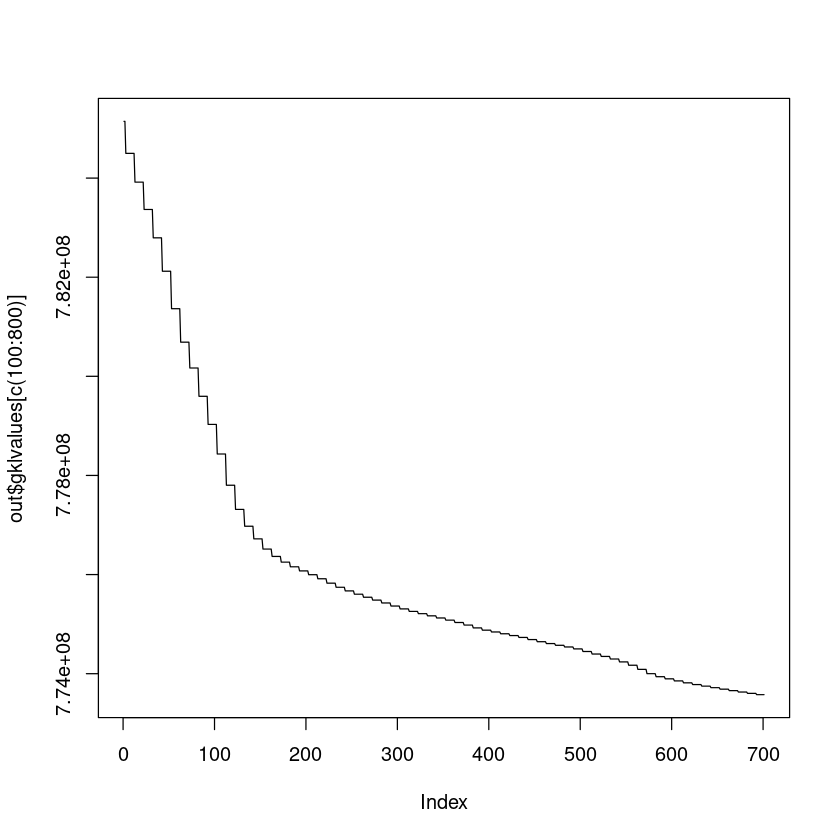

In [17]:
plot(out$gklvalues[c(100:800)], type = 'l')

In [5]:
# Weighting from paper
dat = t(out$signatures)
dat_new=NULL
for(ii in 1:nrow(dat)){
  rr=dat[ii,]
  m1=max(rr)
  m2=max(rr[-which(rr==m1)])
  mm=rep(m1, length(rr))
  mm[which(rr==m1)]=m2
  ns=rr*log((rr+1e-10)/(mm+1e-10))
  dat_new=rbind(dat_new, ns)
}

weight_topgene = NULL
ng = 50
for(topic in 1:ncol(dat)){
    idx = order(dat_new[,topic], decreasing = T)
    weighting = genes[idx[1:ng]]

    weight_topgene = rbind(weight_topgene,c(topic,weighting))

}
write.csv(data.frame(t(weight_topgene)), "resultplots/topgenes_ts_f40_l500_norm.csv", row.names=FALSE)
weight_topgene[,1:18]

[,1] [,2]     [,3]     [,4]    [,5]    [,6]    [,7]     [,8]    [,9]  
 [1,] 1    LAMC2    EPHA2    LAMB3   ITGB1   BCL2L1  MET      MMP7    CCND1 
 [2,] 2    PKM      HDAC1    IDH1    NRAS    LDHA    LMNA     DIABLO  RELA  
 [3,] 3    EPHB3    KIT      NOTCH1  EPHB4   TP53    PPARGC1A CDH1    STAT5A
 [4,] 4    AXIN2    LRP5     LGR6    ERBB3   IRF3    ERBB2    PRKCA   STAT6 
 [5,] 5    NDUFA4L2 SLC26A3  CA9     LRP1    CDKN1A  IFNGR2   PLOD2   TMEM37
 [6,] 6    PLK1     MKI67    CCNB1   AURKA   BIRC5   AURKB    FOXM1   BUB1  
 [7,] 7    FOS      EGR1     JUNB    IL1B    SOCS3   DUSP1    PTGS2   ATF3  
 [8,] 8    SPP1     C1QC     LYZ     FCGR3A  CSF1R   CYBB     CD14    MMP12 
 [9,] 9    VEGFA    DDIT3    CEACAM1 TNFSF9  TCF7L2  CA7      ICOSLG  ROS1  
[10,] 10   MCM2     MCM6     PCNA    E2F1    MSH6    CDK2     CDCA7   MSH2  
[11,] 11   CLCA1    RGMB     SMOC2   LGR5    SOX2    BCL2     PLA2G2A EPHA4 
[12,] 12   MUC2     CXCL10   MMP1    IDO1    ICAM1   SOD2     CXCL11  NFKBIA
[13,] 13   COL1A1   ACTA2    PDGFRB  FN1     COL5A1  MMP11    DES     SFRP2 
[14,] 14   PLVAP    GNLY     VWF     GZMA    TRAC    CD2      CD3E    IL2RB 
[15,] 15   PROX1    CTNNB1   ASCL2   CDKN1B  PIK3CA  CCL7     VTN     CCL1  
[16,] 16   HLA.B    SERPINA1 TAPBP   TAP1    STAT1   TAP2     BST2    HLA.C 
[17,] 17   TGFBI    GPX3     TGFBR2  EGF     DUSP6   TBX10    IL12B   NCR1  
[18,] 18   SPRY2    SRPRB    EPCAM   PTK2    IRS1    ATR      IFNGR1  PTEN  
[19,] 19   MZB1     XBP1     CD79A   POU2AF1 IRF4    FCRL5    DERL3   CD27  
[20,] 20   SOX9     MYC      YAP1    BRD4    CEACAM8 TP63     TCL1A   IL22  
      [,10]     [,11]   [,12]    [,13]    [,14]    [,15]   [,16]  [,17]    
 [1,] AMOTL2    PPARD   EGFR     PDGFA    TEAD1    ZBED2   FOSL1  FGF2     
 [2,] VEGFB     MAP2K1  SMAD2    KRAS     BAX      CD68    PTGDR2 CEACAM8  
 [3,] CCL28     CDK6    CD160    CD70     CCR3     CXCR2   CCL11  IRF5     
 [4,] CREBBP    TSC1    AKT2     IGF1R    IKBKB    LRP6    SRC    LEF1     
 [5,] PKIB      FZD7    NEDD4    FABP2    TSC2     CD160   TCL1A  PRTN3    
 [6,] CHEK2     RAF1    XCL1     IL22     KIR3DL2  ESCO2   CCL28  TBX10    
 [7,] CXCL8     JUN     CSF3R    CEBPB    FFAR2    PROK2   CXCR1  CCL3     
 [8,] MRC1      MMP9    HLA.DQA1 HLA.DPB1 ITGAM    ITGB2   FCGR2A TLR2     
 [9,] WNT3A     PRTN3   PAX5     CXCR1    IGF1     NCAM1   MARCO  CTSG     
[10,] CDK4      MYBL2   AKT1     BRCA1    CHEK1    CCNE1   MLH1   DNMT1    
[11,] RORC      FGFR2   RET      CXCL12   CCR10    PTGDR2  IL17A  TGM2     
[12,] NFKB2     CX3CL1  CCL22    LAMP3    CD83     CD274   CXCL9  CXCL5    
[13,] CD248     COL11A1 PDGFRA   SERPINE1 MYH11    ELN     FGFR1  TGFB3    
[14,] ETS1      CCL5    ZAP70    CTSW     KDR      TIGIT   ENG    FOXP3    
[15,] CD68      CCL26   TP63     TCL1A    XCL1     FLI1    IFNB1  IDO2     
[16,] S100A9    HLA.DRA BAK1     HLA.DMA  HLA.DRB1 MUC1    CSF3   NOS2     
[17,] CXCR5     VTN     IL13     CCL1     CD160    KIR3DL2 KLRF1  TCL1A    
[18,] TBK1      NFE2L2  IFNAR1   VTN      PTGDR2   IL17A   TP63   CD70     
[19,] TNFRSF13C CD79B   CD19     MS4A1    ICAM3    PDK1    VSIR   BLK      
[20,] CCL28     FABP2   XCR1     FGF1     ELANE    ANGPT1  DKK1   TNFRSF13B
      [,18]   
 [1,] CD276   
 [2,] TCL1A   
 [3,] CD1B    
 [4,] TBX3    
 [5,] FGFBP2  
 [6,] PPARGC1A
 [7,] CXCR2   
 [8,] CD163   
 [9,] TNF     
[10,] TEAD4   
[11,] VTN     
[12,] CXCL2   
[13,] FBLN1   
[14,] MMRN2   
[15,] CD177   
[16,] TNFSF10 
[17,] FLI1    
[18,] CD207   
[19,] IFNAR2  
[20,] SMO

Warning message in data.row.names(row.names, rowsi, i):
“some row.names duplicated: 783551,783555,783556,783558,783559,783560,783561,783562,783563,783565,783566,783567,783568,783570,783571,783573,783574,783576,783577,783579,783580,783583,783585,783586,783589,783590,783591,783593,783594,783595,783596,783597,783598,783599,783600,783601,783604,783606,783608,783609,783611,783613,783630,783631,783633,783634,783635,783636,783637,783638,783640,783642,783643,783644,783645,783646,783647,783648,783650,783651,783652,783653,783655,783656,783657,783658,783660,783662,783663,783664,783665,783667,783668,783669,783670,783671,783673,783675,783676,783677,783679,783680,783683,783685,783686,783687,783688,783689,783693,783694,783695,783696,783697,783698,783699,783700,783701,783702,783703,783704,783705,783706,783707,783708,783709,783710,783712,783713,783714,783716,783717,783720,783721,783723,783724,783725,783726,783729,783730,783731,783732,783734,783736,783737,783738,783740,783742,783743,783744,783745,783746

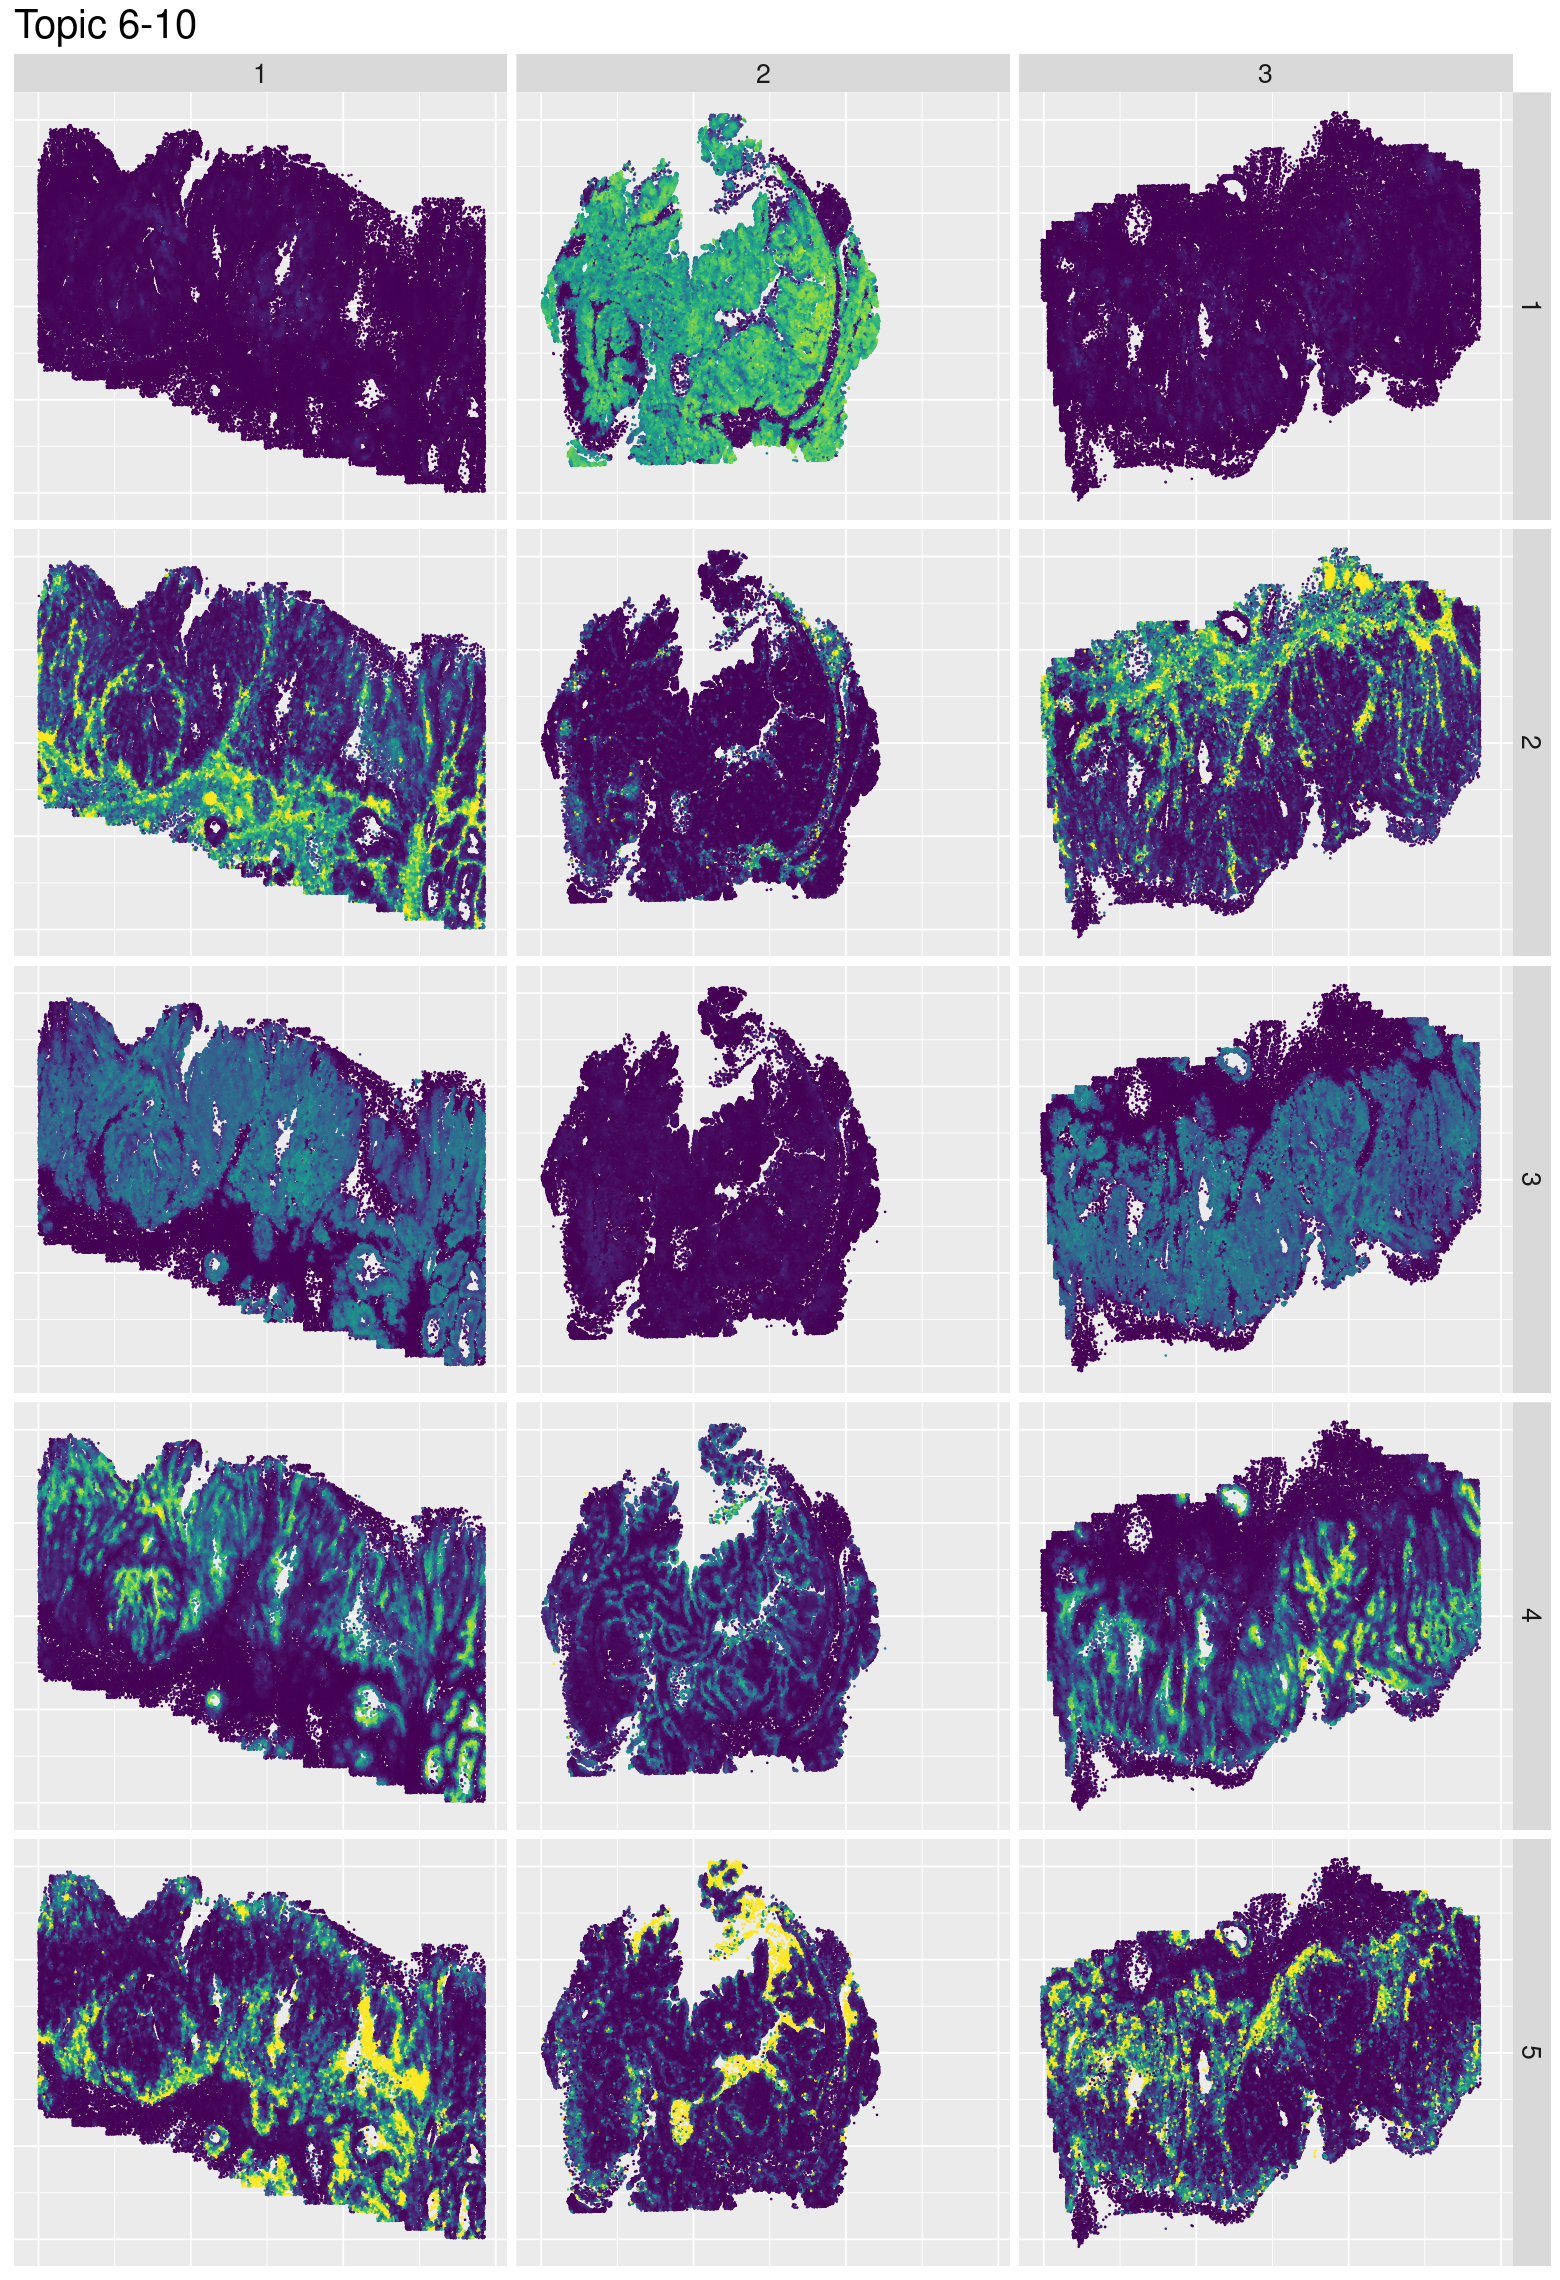

In [11]:
norm_exp = out$exposures/rowSums(out$exposures)
norm_exp = t(t(norm_exp)/colSums(norm_exp))

topics = c(6:10)
# Plot weights for a certain topic 
dat = data.frame(exp = norm_exp[,topics], name = c(rep(1,nrow(location1)),rep(2,nrow(location2)),rep(3,nrow(location3))), location = rbind(location1,location2*9.259,location3*9.259))

plotdat = reshape(dat, varying = colnames(dat)[c(1:5)], direction = 'long', v.names = "prob")

plot_idx = sample(1:nrow(plotdat),floor(nrow(plotdat)*0.2))

plotdat = plotdat[plot_idx,]

options(repr.plot.width=13, repr.plot.height=19)
plotdat$probq = plotdat$prob
qmax = quantile(plotdat$probq, 0.99)
plotdat$probq[plotdat$prob > qmax] = qmax

plotdat$location.center_y = -plotdat$location.center_y
ggplot(plotdat, aes(x = location.center_x, y = location.center_y, col = probq))+
        geom_point(cex = 0.1)+
        facet_grid(time~name)+
        theme(text = element_text(size = 20),
        legend.position = "none", 
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank()
        )+
        scale_color_viridis()+
        ggtitle(paste0("Topic 6-10"))

In [ ]:
# More distinct genes
dat = t(out$signatures)
dat_new=NULL
for(ii in 1:nrow(dat)){
  rr=dat[ii,]
  m1=max(rr)
  m2=max(rr[-which(rr==m1)])
  mm=rep(m1, length(rr))
  mm[which(rr==m1)]=m2
  ns=rr/mm
  dat_new=rbind(dat_new, ns)
}

weight_topgene = NULL
ng = 18
for(topic in 1:20){
    idx = order(dat_new[,topic], decreasing = T)
    weighting = genes[idx[1:ng]]

    weight_topgene = rbind(weight_topgene,c(topic,weighting))

}

weight_topgene

## Violin plot for celltype 

In [33]:
# load data for celltype plot
total = nrow(metadata1)
celltype = rep("none",total)
cell_annotation = read.csv('data/celltype_LH.csv')

celltype[cell_annotation[,1] + 1] = as.character(cell_annotation[,2])

idx1 = read.csv("data/cellidx_LH.csv")[,1]

celltype = celltype[idx1]

In [34]:
load("modelssaved/three_sample_f5_s5K_l500_norm_i1000.RData")

In [35]:
norm_exp = out$exposures[1:sum(idx1),]/rowSums(out$exposures[1:sum(idx1),])
norm_exp = t(t(norm_exp)/colSums(norm_exp))

dat = data.frame(celltype = celltype, prob = norm_exp)

plotdat = reshape(dat, varying = colnames(dat)[-c(1)], direction = 'long', v.names = "prob")

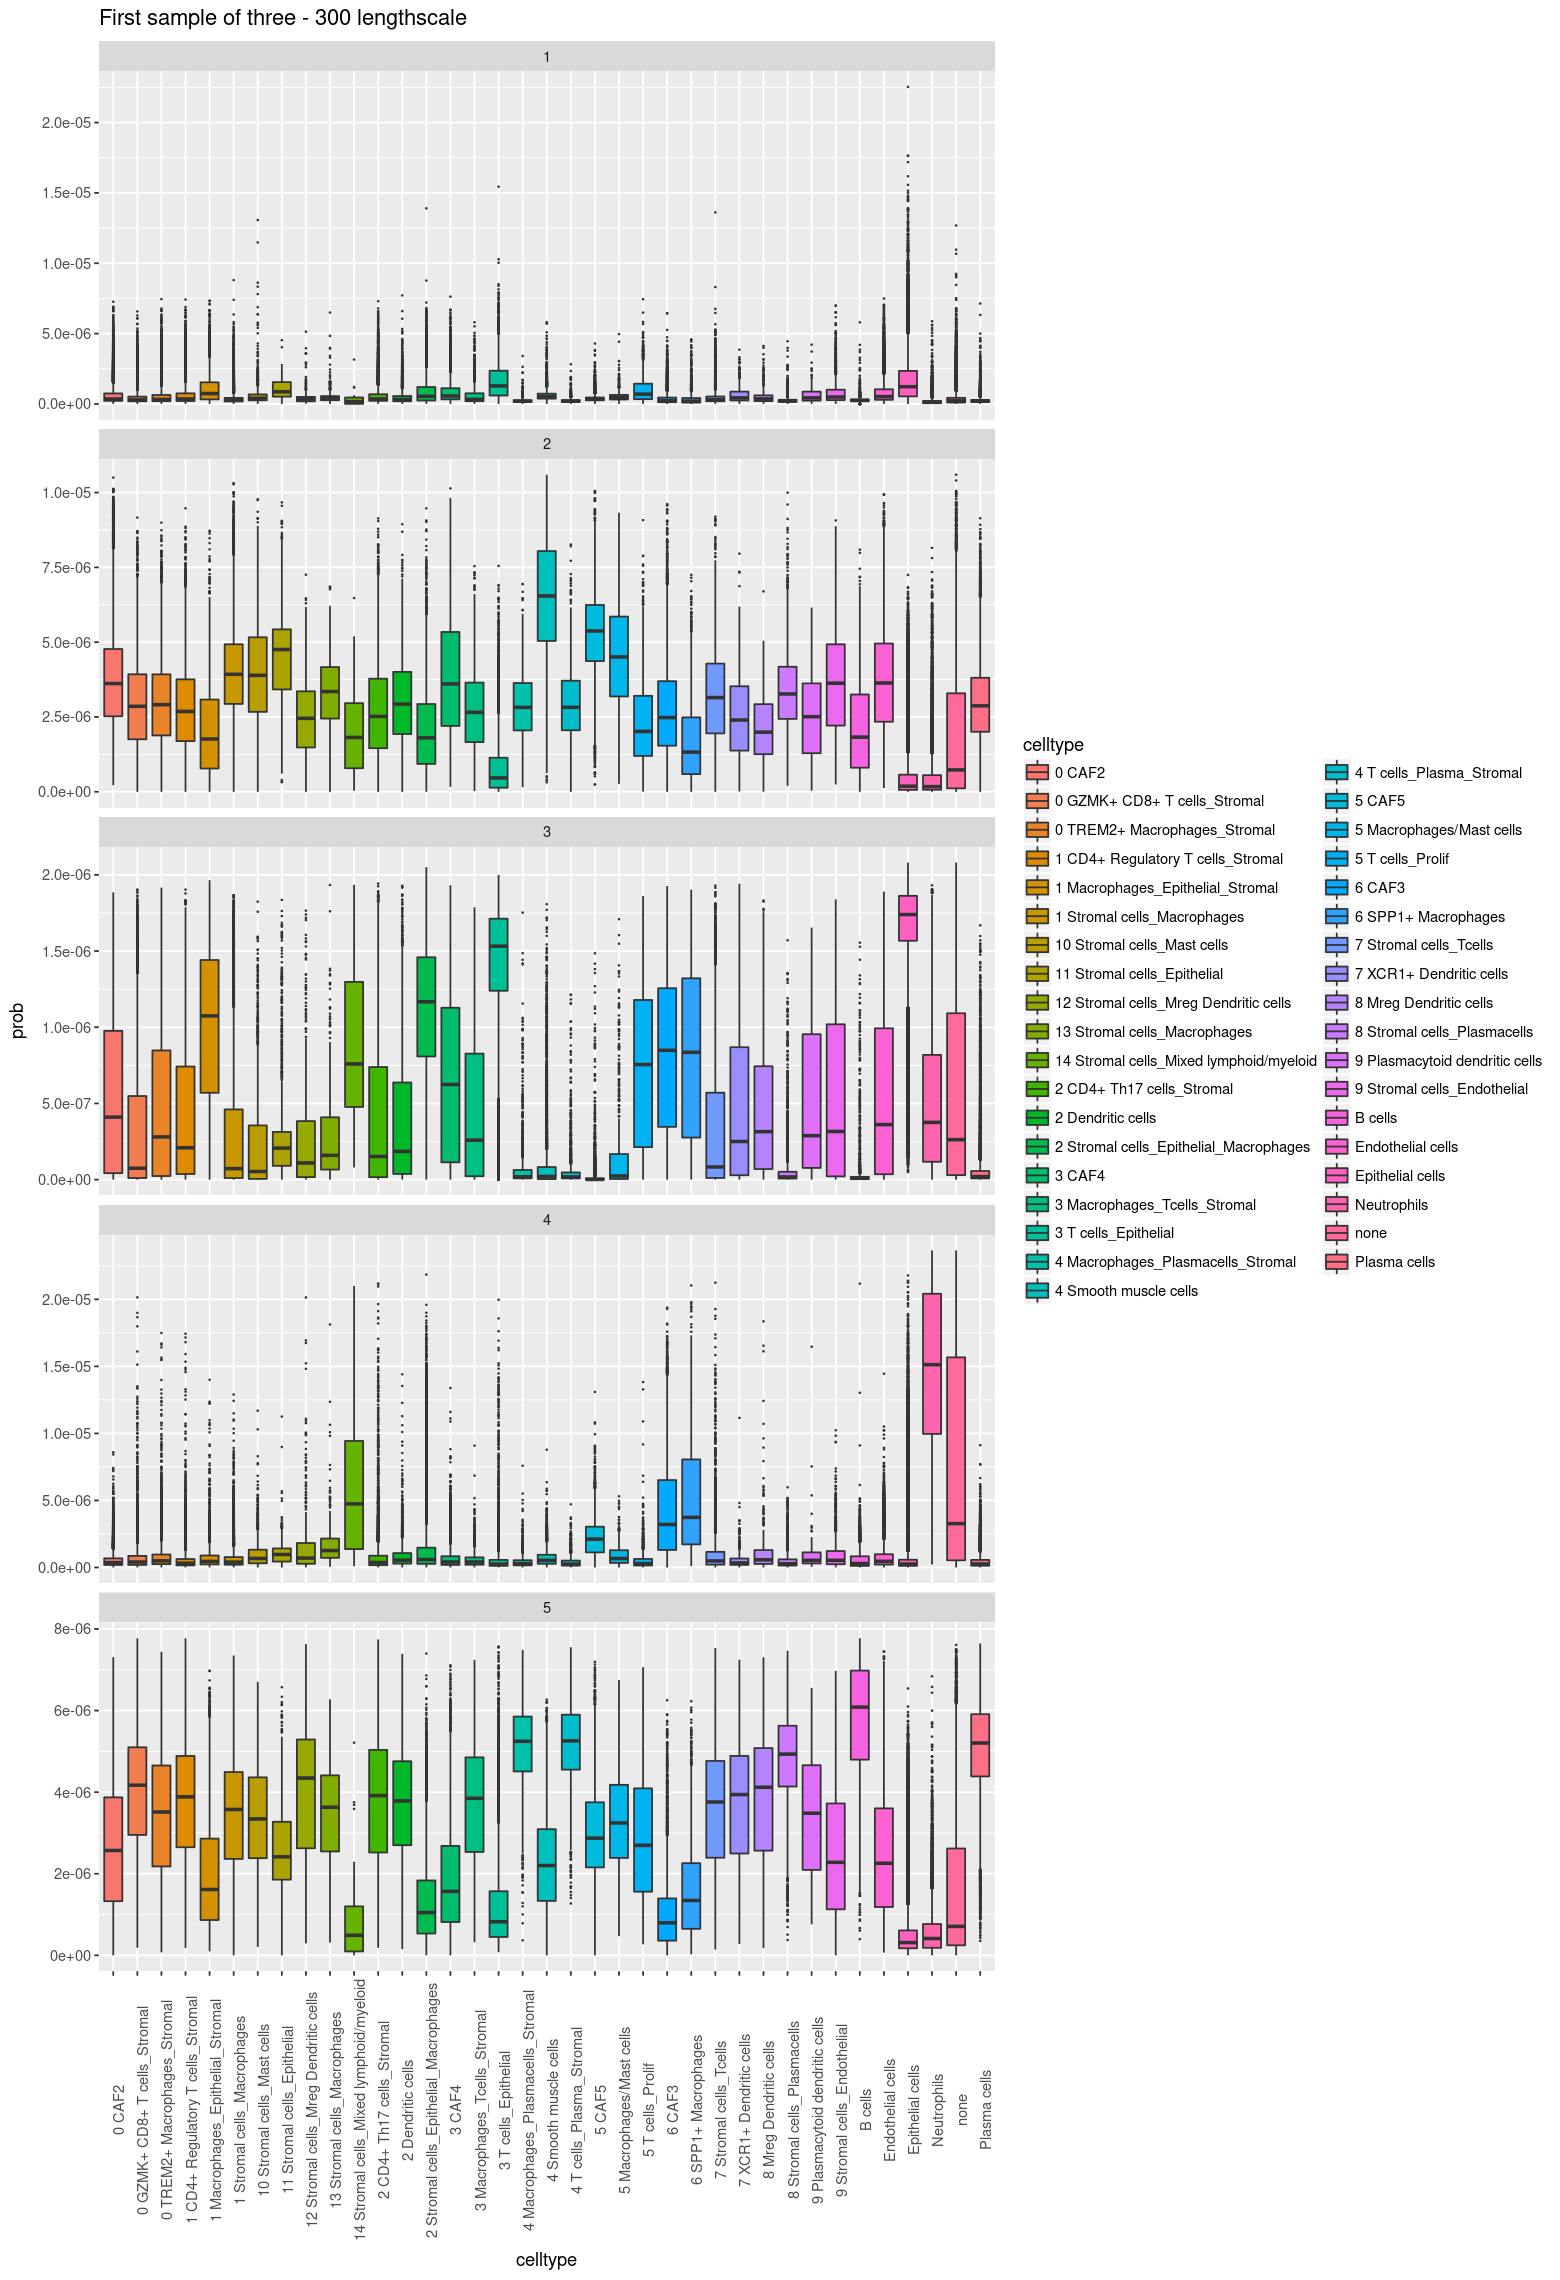

In [37]:
options(repr.plot.width=13, repr.plot.height=19)
ggplot(plotdat, aes(x = celltype, y = prob, fill = celltype))+
    
    #geom_violin(aes(col = celltype))+
    geom_boxplot(outlier.size = 0.1)+
    facet_wrap(~time, nrow = 10, scale = 'free_y')+
    theme(axis.text.x = element_text(angle = 90))+
    #scale_y_continuous(limits = quantile(plotdat$prob, c(0, 0.9)))+
    ggtitle('First sample of three - 300 lengthscale')

In [ ]:
# one plot for each topic
options(repr.plot.width=13, repr.plot.height=19)
ggplot(plotdat, aes(x = celltype, y = prob, fill = celltype))+
    
    #geom_violin(aes(col = celltype))+
    geom_boxplot(outlier.size = 0.1)+
    facet_wrap(~time, nrow = 10, scale = 'free_y')+
    theme(axis.text.x = element_text(angle = 90))+
    #scale_y_continuous(limits = quantile(plotdat$prob, c(0, 0.9)))+
    ggtitle('First sample of three - 300 lengthscale')

In [6]:
plotnew = plotdat %>% group_by(celltype) %>% mutate(total = length(celltype))

celltype    time prob         id total 
1 Neutrophils 1    4.164322e-07 1  365940
2 Neutrophils 1    9.727729e-08 2  365940
3 Neutrophils 1    2.056922e-07 3  365940
4 Neutrophils 1    4.467247e-07 4  365940
5 Neutrophils 1    3.619595e-07 5  365940
6 Neutrophils 1    3.450229e-07 6  365940

In [7]:
plotdat1 = plotnew[plotnew$prob > quantile(plotnew$prob, 0.5), ]

In [15]:
plotdat2 = plotdat1 %>% group_by(celltype,time) %>% summarize(total2 = sum(prob)/mean(total))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

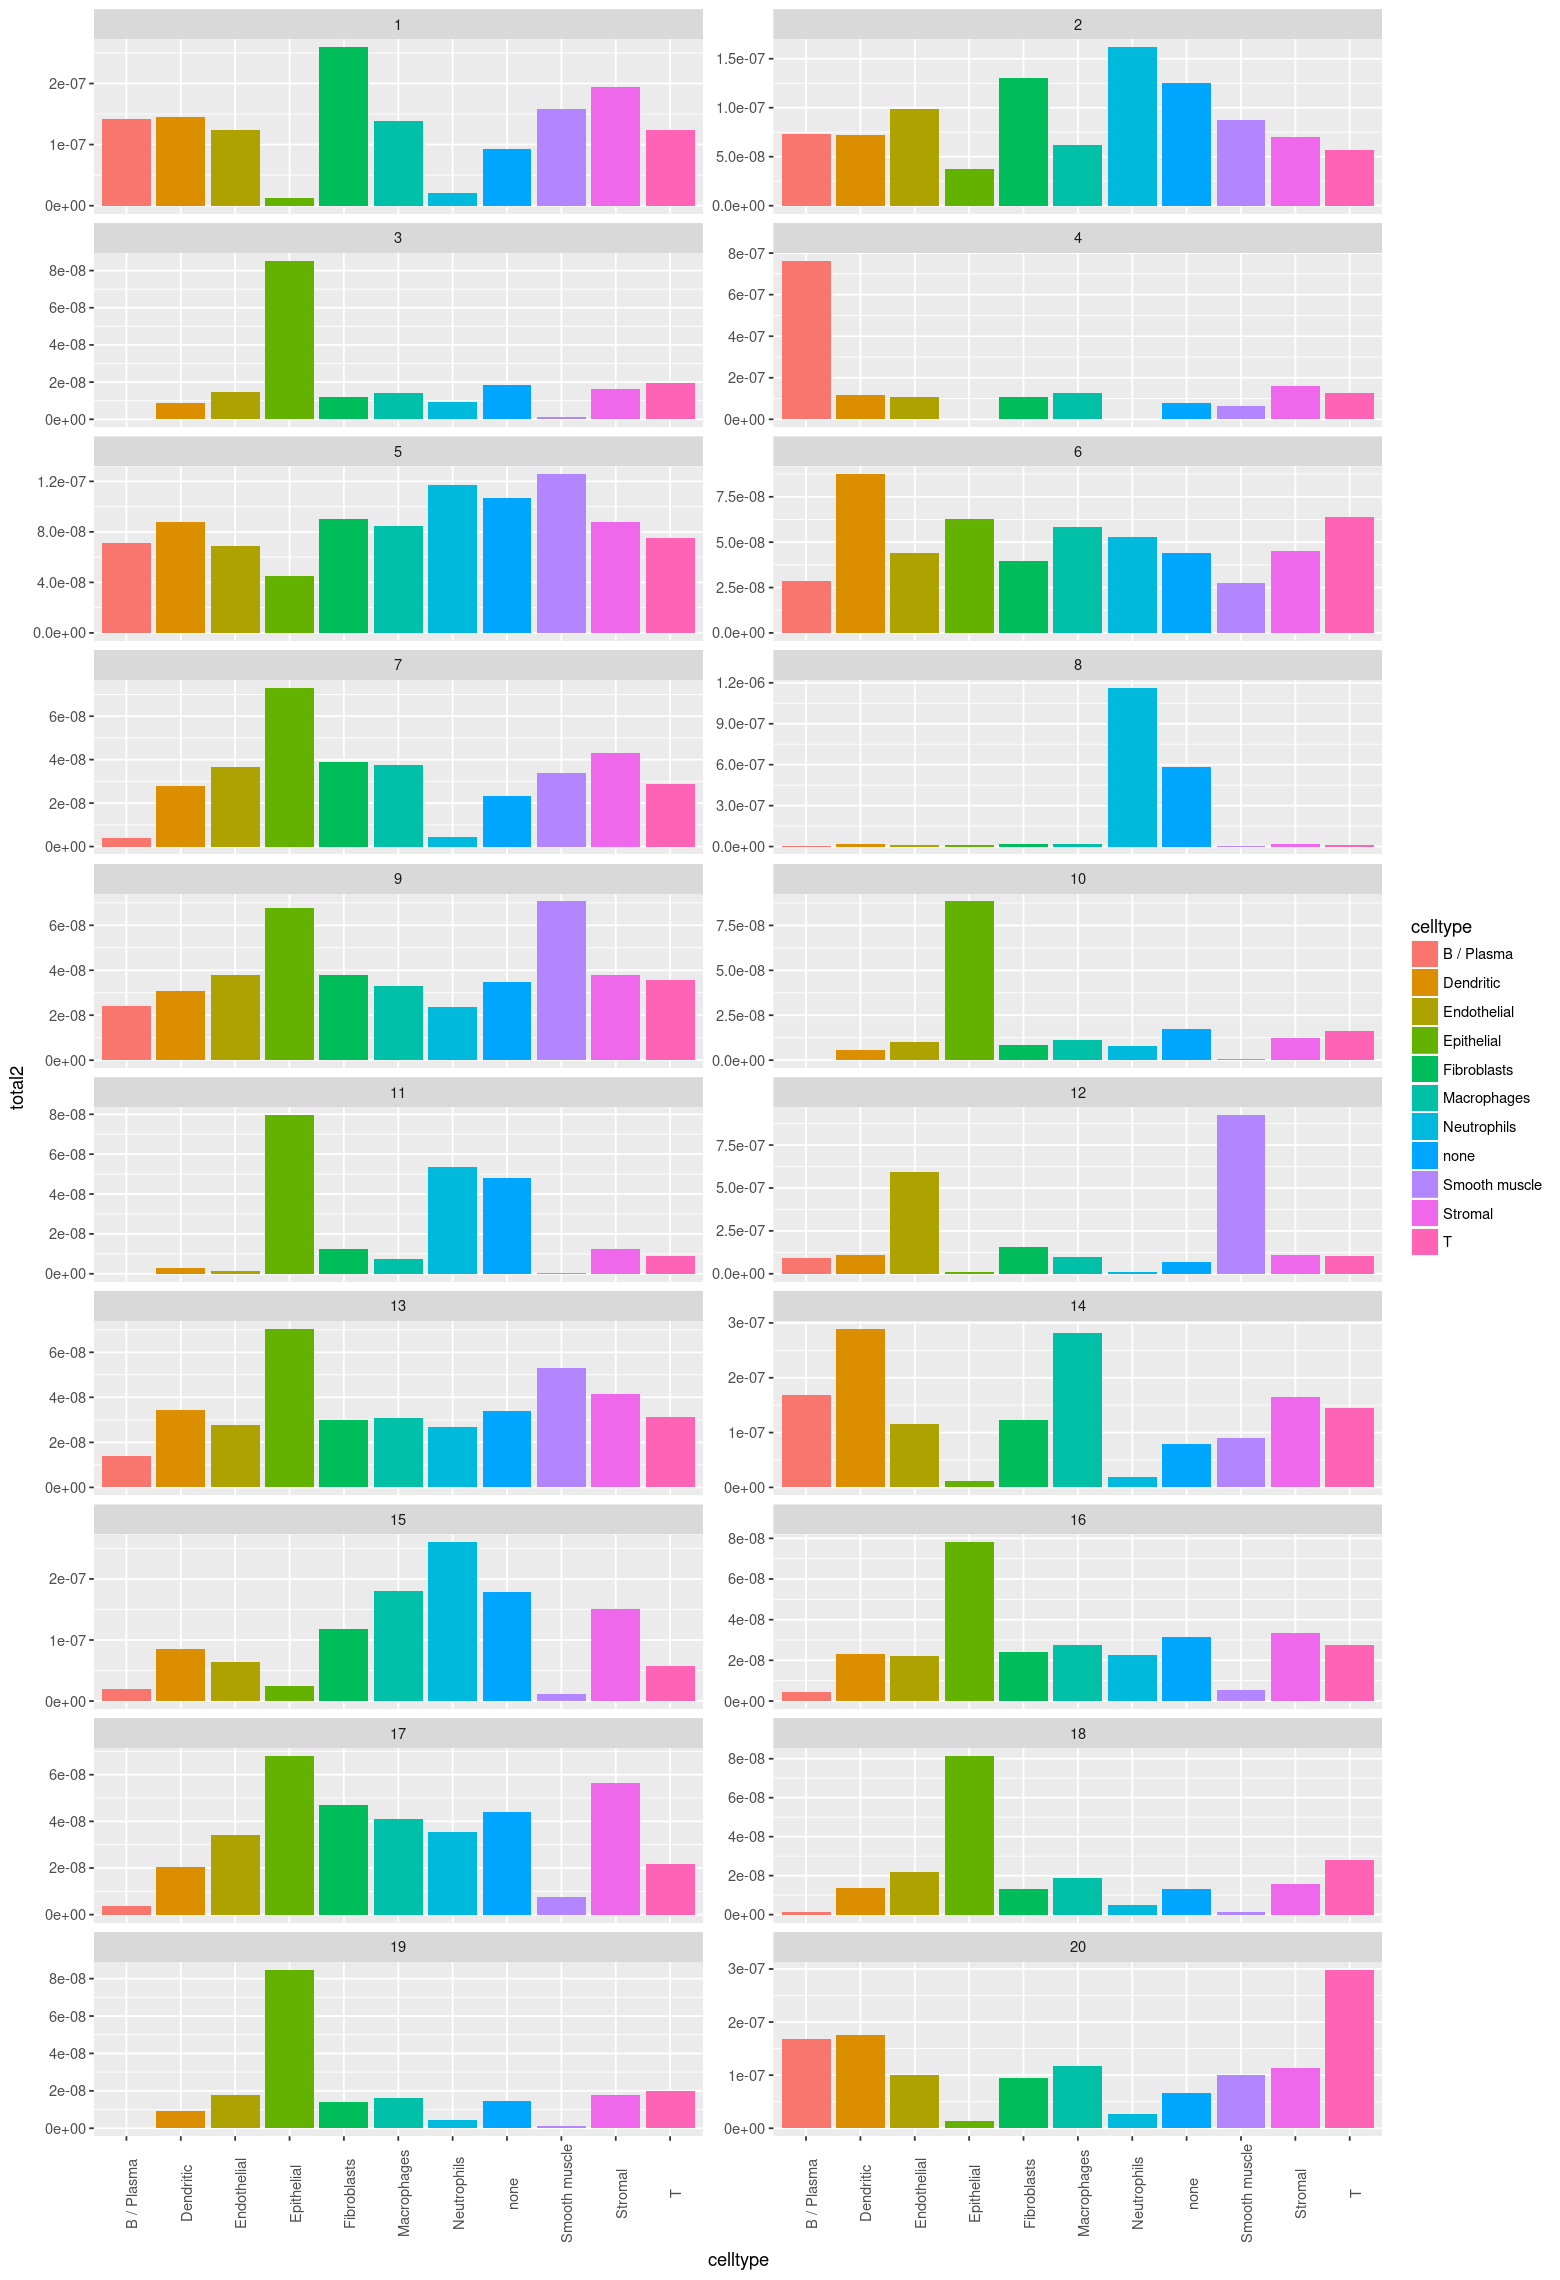

In [17]:
options(repr.plot.width=13, repr.plot.height=19)
ggplot(plotdat2, aes(x = celltype, y = total2, fill = celltype))+
    geom_histogram(stat = 'identity')+
    facet_wrap(~time, nrow = 10, scale = 'free_y')+
    theme(axis.text.x = element_text(angle = 90))